# Credit scoring models

We will train our credit scoring models based on the HELOC dataset which was published by FICO for their [Explainable ML Challenge](https://community.fico.com/s/explainable-machine-learning-challenge).

## Load data

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
!ln -s ../data

ln: ./data: File exists


In [3]:
DATA_PATH = "data/heloc/heloc_dataset_v1.csv"

In [4]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [5]:
raw = pd.read_csv(DATA_PATH)
raw.shape

(10459, 24)

In [6]:
raw.head()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,MaxDelqEver,NumTotalTrades,NumTradesOpeninLast12M,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,55,144,4,84,20,3,0,83,2,3,5,23,1,43,0,0,0,33,-8,8,1,1,69
1,Bad,61,58,15,41,2,4,4,100,-7,0,8,7,0,67,0,0,0,0,-8,0,-8,-8,0
2,Bad,67,66,5,24,9,0,0,100,-7,7,8,9,4,44,0,4,4,53,66,4,2,1,86
3,Bad,66,169,1,73,28,1,1,93,76,6,6,30,3,57,0,5,4,72,83,6,4,3,91
4,Bad,81,333,27,132,12,0,0,100,-7,7,8,12,0,25,0,1,1,51,89,3,1,0,80


In [7]:
raw.dtypes

RiskPerformance                       object
ExternalRiskEstimate                   int64
MSinceOldestTradeOpen                  int64
MSinceMostRecentTradeOpen              int64
AverageMInFile                         int64
NumSatisfactoryTrades                  int64
NumTrades60Ever2DerogPubRec            int64
NumTrades90Ever2DerogPubRec            int64
PercentTradesNeverDelq                 int64
MSinceMostRecentDelq                   int64
MaxDelq2PublicRecLast12M               int64
MaxDelqEver                            int64
NumTotalTrades                         int64
NumTradesOpeninLast12M                 int64
PercentInstallTrades                   int64
MSinceMostRecentInqexcl7days           int64
NumInqLast6M                           int64
NumInqLast6Mexcl7days                  int64
NetFractionRevolvingBurden             int64
NetFractionInstallBurden               int64
NumRevolvingTradesWBalance             int64
NumInstallTradesWBalance               int64
NumBank2Na

## Basic preprocessing

### Label preprocessing

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin

In [9]:
# custom Transformer that recodes string variables
class StringEncoder(BaseEstimator, TransformerMixin):
    
    def __init__(self, classes):
        self.classes_ = classes
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X.replace(to_replace=self.classes_)

In [10]:
enc = StringEncoder({'Good': 0, 'Bad': 1})
enc.fit(raw.RiskPerformance)
enc.classes_

{'Good': 0, 'Bad': 1}

In [11]:
raw.RiskPerformance = enc.transform(raw.RiskPerformance)
raw.head()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,MaxDelqEver,NumTotalTrades,NumTradesOpeninLast12M,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,1,55,144,4,84,20,3,0,83,2,3,5,23,1,43,0,0,0,33,-8,8,1,1,69
1,1,61,58,15,41,2,4,4,100,-7,0,8,7,0,67,0,0,0,0,-8,0,-8,-8,0
2,1,67,66,5,24,9,0,0,100,-7,7,8,9,4,44,0,4,4,53,66,4,2,1,86
3,1,66,169,1,73,28,1,1,93,76,6,6,30,3,57,0,5,4,72,83,6,4,3,91
4,1,81,333,27,132,12,0,0,100,-7,7,8,12,0,25,0,1,1,51,89,3,1,0,80


### Empty row removal

In [12]:
y = raw.pop('RiskPerformance')
y = y[(raw > -9).any(axis=1)].reset_index(drop=True)
raw = raw.loc[(raw > -9).any(axis=1)].reset_index(drop=True)
raw.shape

(9871, 23)

## Naive benchmarks: logistic regression & random forest

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = raw

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8883, 23)
(988, 23)
(8883,)
(988,)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [17]:
log_reg = LogisticRegression().fit(X_train, y_train)
print(log_reg.score(X_train, y_train))
print(log_reg.score(X_test, y_test))

0.7124845209951592
0.6953441295546559


/Users/felix/miniconda3/envs/ethical_ai/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [18]:
rf = RandomForestClassifier(n_estimators=150, max_features=0.7, min_samples_leaf=10, max_depth=10)
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

0.8120004502983227
0.7074898785425101


## Basic feature engineering

### Handling missing values

The following codes are used for missing values:
- `-9`: No Bureau Record or No Investigation
- `-8`: No Usable/Valid Trades or Inquiries
- `-7`: Condition not Met (e.g. No Inquiries, No Delinquencies)

In [19]:
X.shape

(9871, 23)

In [20]:
import numpy as np

def missing_freq_by_col(data, missing_codes):
    res_list = []
    for col in data.columns:
        counts = data[col].value_counts(normalize=True)
        res = []
        for code in missing_codes:
            if code in counts.index:
                res.append(counts.loc[code])
            else:
                res.append(0.0)
        res_list.append(res)
    return pd.DataFrame(data=np.array(res_list), index=data.columns, columns=missing_codes)

In [21]:
missing_freq_by_col(X, [-9, -8, -7])

,-9,-8,-7
ExternalRiskEstimate,0.001013,0.000000,0.000000
MSinceOldestTradeOpen,0.000000,0.024212,0.000000
MSinceMostRecentTradeOpen,0.000000,0.000000,0.000000
AverageMInFile,0.000000,0.000000,0.000000
NumSatisfactoryTrades,0.000000,0.000000,0.000000
NumTrades60Ever2DerogPubRec,0.000000,0.000000,0.000000
NumTrades90Ever2DerogPubRec,0.000000,0.000000,0.000000
PercentTradesNeverDelq,0.000000,0.000000,0.000000
MSinceMostRecentDelq,0.000000,0.017830,0.472495
MaxDelq2PublicRecLast12M,0.000000,0.000000,0.000000


In [22]:
from sklearn.impute import MissingIndicator

In [23]:
ind_nm = MissingIndicator(missing_values=-7)
ind_nm.fit(X)
df_nm = pd.DataFrame(data=ind_nm.transform(X), columns=[c+'_not_met' for c in X.columns[ind_nm.features_]])
df_nm.shape

(9871, 2)

In [24]:
ind_inv = MissingIndicator(missing_values=-8)
ind_inv.fit(X)
df_inv = pd.DataFrame(data=ind_inv.transform(X), columns=[c+'_invalid' for c in X.columns[ind_inv.features_]])
df_inv.shape

(9871, 9)

In [25]:
ind_nr = MissingIndicator(missing_values=-9)
ind_nr.fit(X)
df_nr = pd.DataFrame(data=ind_nr.transform(X), columns=[c+'_no_record' for c in X.columns[ind_nr.features_]])
df_nr.shape

(9871, 1)

In [26]:
X.shape

(9871, 23)

In [27]:
X = pd.concat([X, df_nm, df_inv, df_nr], axis=1)
X.shape

(9871, 35)

In [28]:
X.head()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,MaxDelqEver,NumTotalTrades,NumTradesOpeninLast12M,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,MSinceMostRecentDelq_not_met,MSinceMostRecentInqexcl7days_not_met,MSinceOldestTradeOpen_invalid,MSinceMostRecentDelq_invalid,MSinceMostRecentInqexcl7days_invalid,NetFractionRevolvingBurden_invalid,NetFractionInstallBurden_invalid,NumRevolvingTradesWBalance_invalid,NumInstallTradesWBalance_invalid,NumBank2NatlTradesWHighUtilization_invalid,PercentTradesWBalance_invalid,ExternalRiskEstimate_no_record
0,55,144,4,84,20,3,0,83,2,3,5,23,1,43,0,0,0,33,-8,8,1,1,69,False,False,False,False,False,False,True,False,False,False,False,False
1,61,58,15,41,2,4,4,100,-7,0,8,7,0,67,0,0,0,0,-8,0,-8,-8,0,True,False,False,False,False,False,True,False,True,True,False,False
2,67,66,5,24,9,0,0,100,-7,7,8,9,4,44,0,4,4,53,66,4,2,1,86,True,False,False,False,False,False,False,False,False,False,False,False
3,66,169,1,73,28,1,1,93,76,6,6,30,3,57,0,5,4,72,83,6,4,3,91,False,False,False,False,False,False,False,False,False,False,False,False
4,81,333,27,132,12,0,0,100,-7,7,8,12,0,25,0,1,1,51,89,3,1,0,80,True,False,False,False,False,False,False,False,False,False,False,False


In [29]:
# custom Transformer that marks missing values with different codes
class MissingValueEncoder(BaseEstimator, TransformerMixin):
    
    def __init__(self, codes):
        self.codes_ = codes
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X.replace(to_replace=self.codes_, value=np.nan)

In [30]:
mv_enc = MissingValueEncoder([-9, -8, -7])
mv_enc.fit(X)
X = mv_enc.transform(X)
X.head()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,MaxDelqEver,NumTotalTrades,NumTradesOpeninLast12M,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,MSinceMostRecentDelq_not_met,MSinceMostRecentInqexcl7days_not_met,MSinceOldestTradeOpen_invalid,MSinceMostRecentDelq_invalid,MSinceMostRecentInqexcl7days_invalid,NetFractionRevolvingBurden_invalid,NetFractionInstallBurden_invalid,NumRevolvingTradesWBalance_invalid,NumInstallTradesWBalance_invalid,NumBank2NatlTradesWHighUtilization_invalid,PercentTradesWBalance_invalid,ExternalRiskEstimate_no_record
0,55.0,144.0,4,84,20,3,0,83,2.0,3,5,23,1,43,0.0,0,0,33.0,NaN,8.0,1.0,1.0,69.0,False,False,False,False,False,False,True,False,False,False,False,False
1,61.0,58.0,15,41,2,4,4,100,NaN,0,8,7,0,67,0.0,0,0,0.0,NaN,0.0,NaN,NaN,0.0,True,False,False,False,False,False,True,False,True,True,False,False
2,67.0,66.0,5,24,9,0,0,100,NaN,7,8,9,4,44,0.0,4,4,53.0,66.0,4.0,2.0,1.0,86.0,True,False,False,False,False,False,False,False,False,False,False,False
3,66.0,169.0,1,73,28,1,1,93,76.0,6,6,30,3,57,0.0,5,4,72.0,83.0,6.0,4.0,3.0,91.0,False,False,False,False,False,False,False,False,False,False,False,False
4,81.0,333.0,27,132,12,0,0,100,NaN,7,8,12,0,25,0.0,1,1,51.0,89.0,3.0,1.0,0.0,80.0,True,False,False,False,False,False,False,False,False,False,False,False


In [31]:
from sklearn.impute import SimpleImputer

In [32]:
imp = SimpleImputer(strategy='median')
imp.fit(X)
cols = X.columns
X = pd.DataFrame(data=imp.transform(X), columns=cols)
X.head()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,MaxDelqEver,NumTotalTrades,NumTradesOpeninLast12M,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,MSinceMostRecentDelq_not_met,MSinceMostRecentInqexcl7days_not_met,MSinceOldestTradeOpen_invalid,MSinceMostRecentDelq_invalid,MSinceMostRecentInqexcl7days_invalid,NetFractionRevolvingBurden_invalid,NetFractionInstallBurden_invalid,NumRevolvingTradesWBalance_invalid,NumInstallTradesWBalance_invalid,NumBank2NatlTradesWHighUtilization_invalid,PercentTradesWBalance_invalid,ExternalRiskEstimate_no_record
0,55.0,144.0,4.0,84.0,20.0,3.0,0.0,83.0,2.0,3.0,5.0,23.0,1.0,43.0,0.0,0.0,0.0,33.0,74.0,8.0,1.0,1.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,61.0,58.0,15.0,41.0,2.0,4.0,4.0,100.0,15.0,0.0,8.0,7.0,0.0,67.0,0.0,0.0,0.0,0.0,74.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,67.0,66.0,5.0,24.0,9.0,0.0,0.0,100.0,15.0,7.0,8.0,9.0,4.0,44.0,0.0,4.0,4.0,53.0,66.0,4.0,2.0,1.0,86.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,66.0,169.0,1.0,73.0,28.0,1.0,1.0,93.0,76.0,6.0,6.0,30.0,3.0,57.0,0.0,5.0,4.0,72.0,83.0,6.0,4.0,3.0,91.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,81.0,333.0,27.0,132.0,12.0,0.0,0.0,100.0,15.0,7.0,8.0,12.0,0.0,25.0,0.0,1.0,1.0,51.0,89.0,3.0,1.0,0.0,80.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Feature distributions

In [33]:
import matplotlib.pyplot as plt

#### Numerical variables

In [34]:
X.shape

(9871, 35)

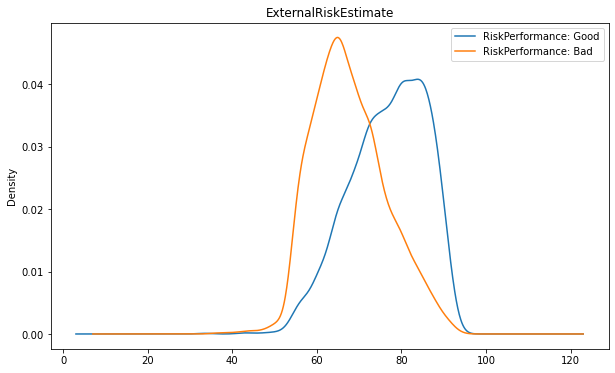

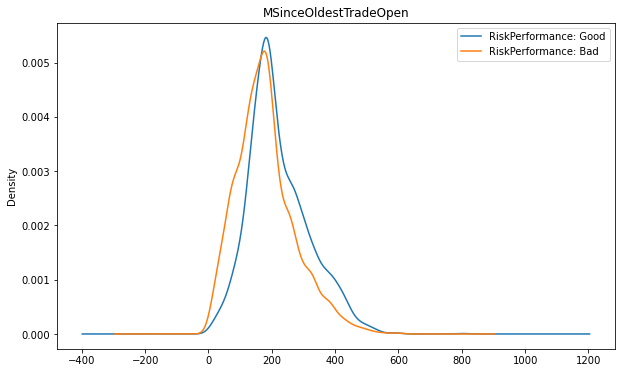

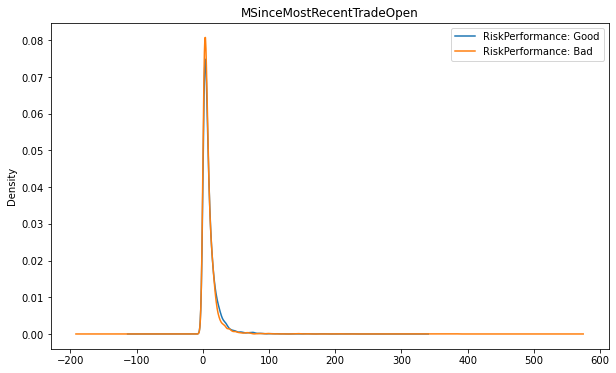

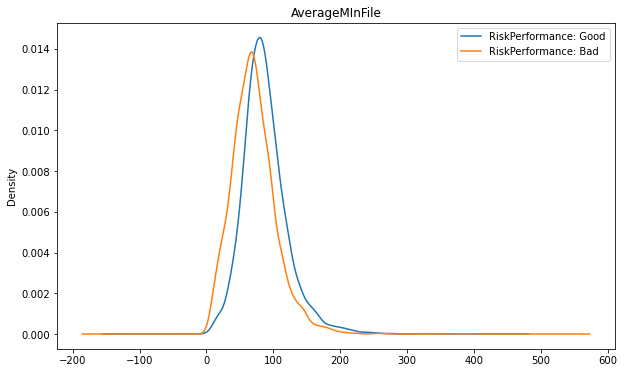

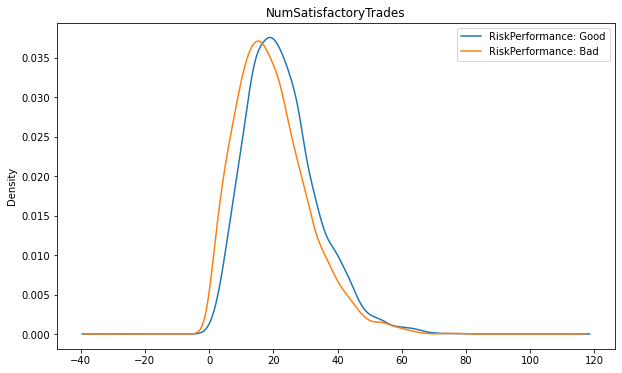

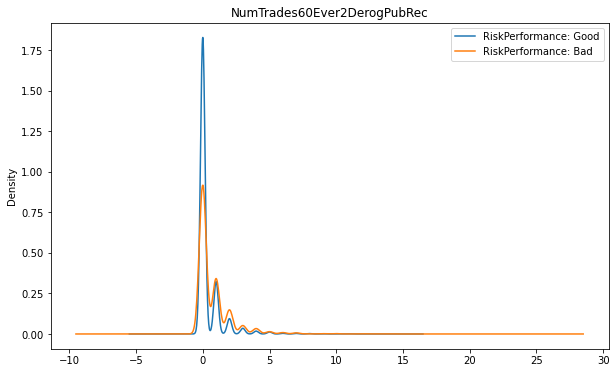

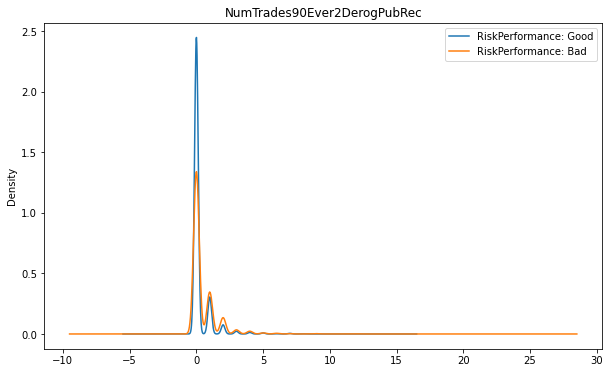

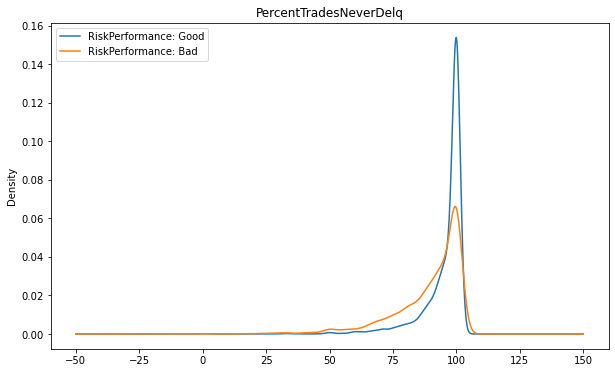

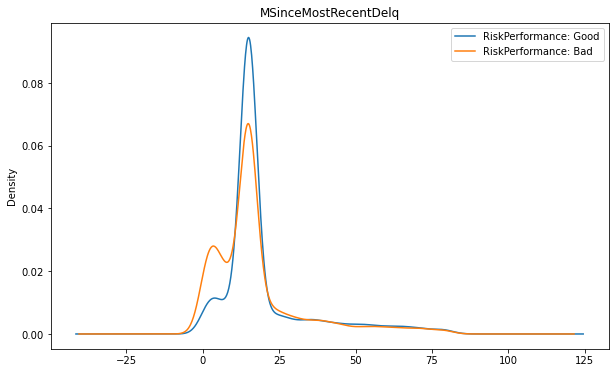

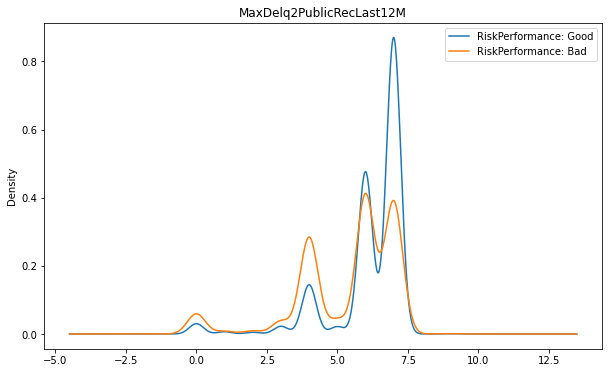

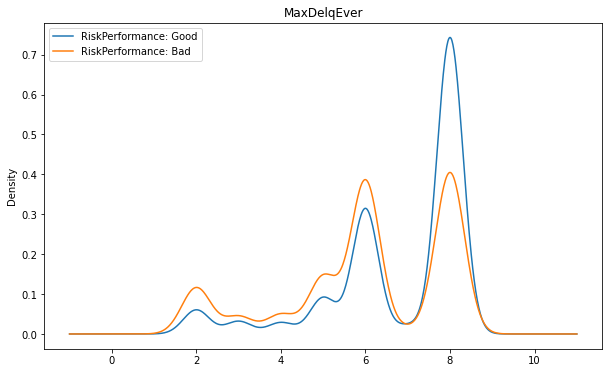

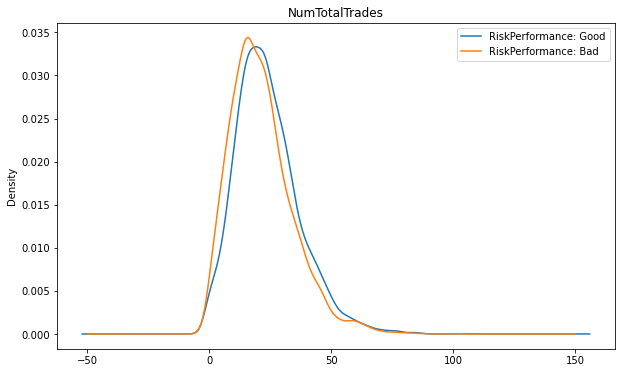

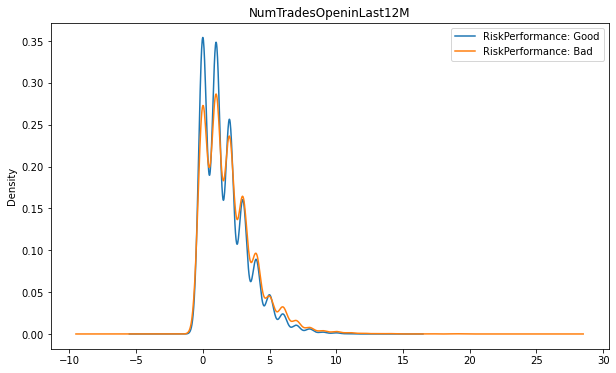

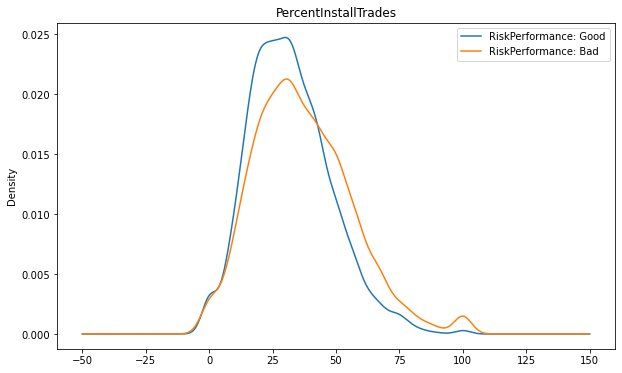

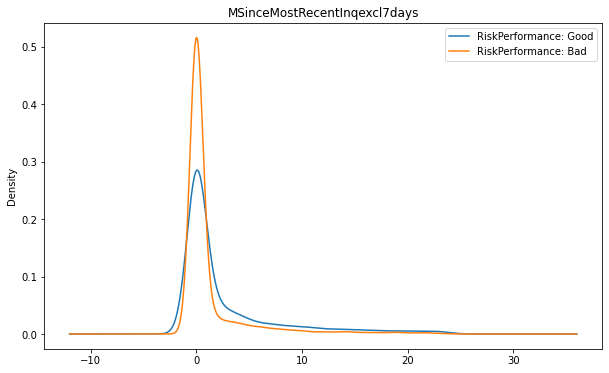

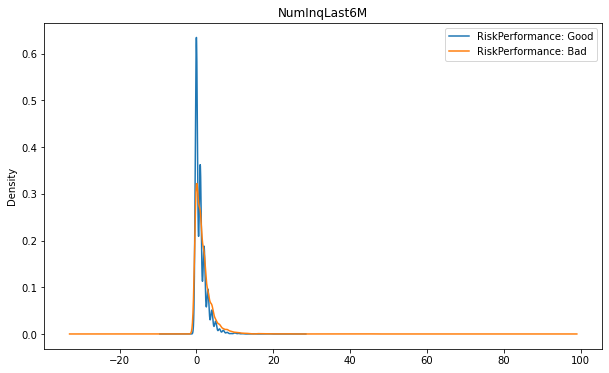

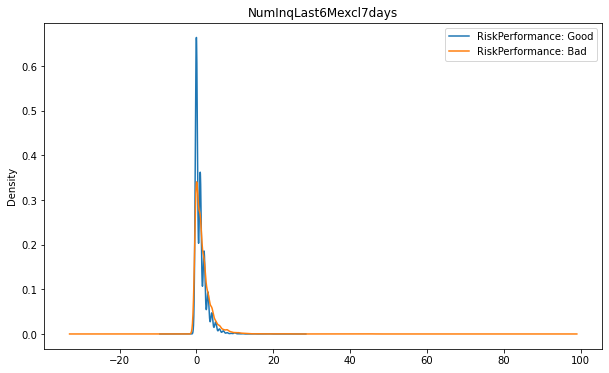

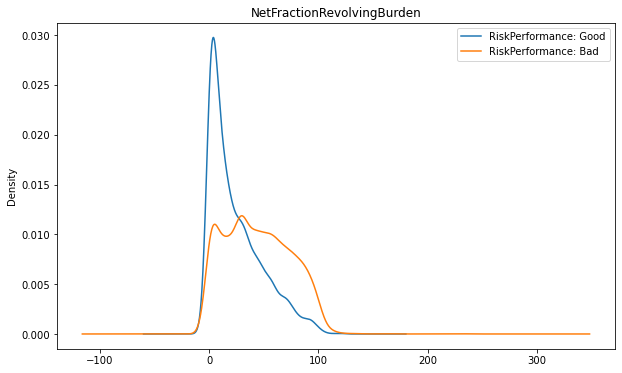

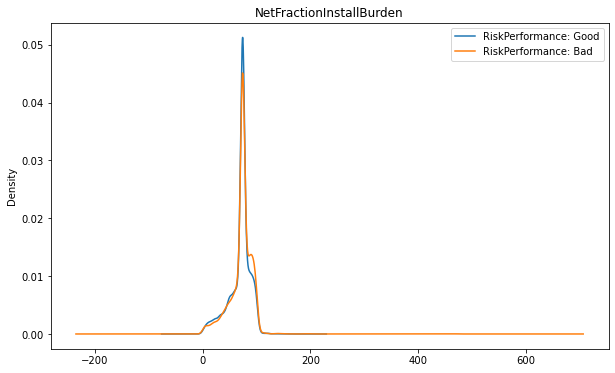

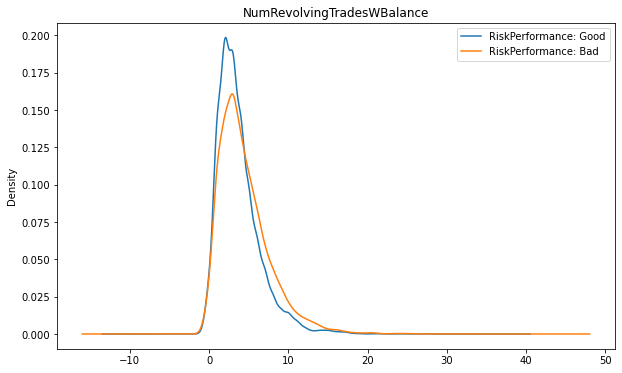

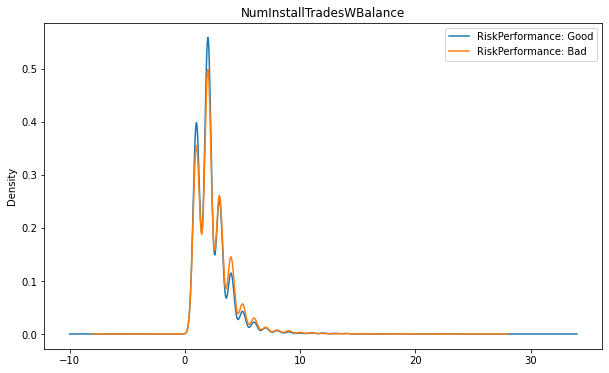

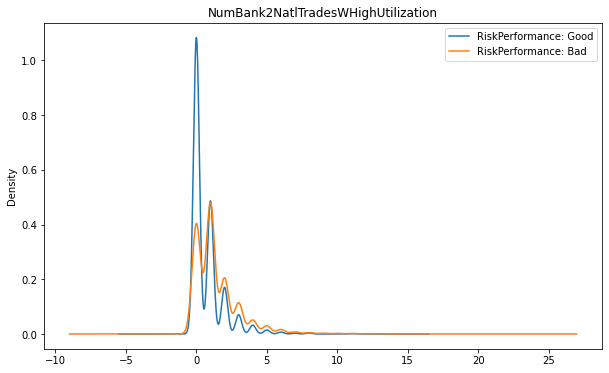

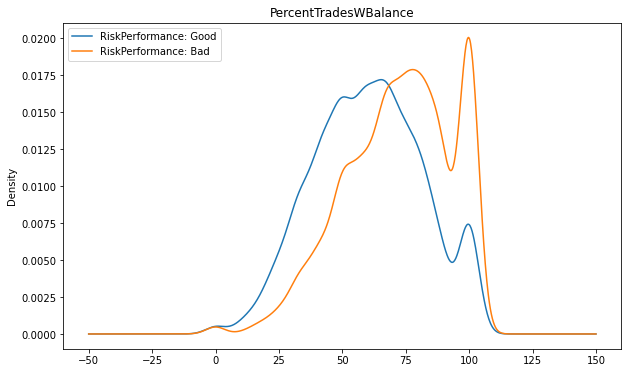

In [35]:
proc = pd.concat([y, X], axis=1)
for col in X.columns[:(raw.shape[1])]:
    ax = proc.groupby(['RiskPerformance'])[col].plot.density(title=col, figsize=(10,6))
    plt.legend(['RiskPerformance: Good', 'RiskPerformance: Bad'])
    plt.show()

#### Dummy variables

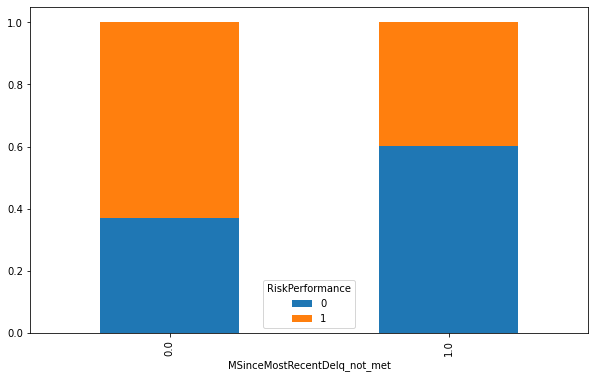

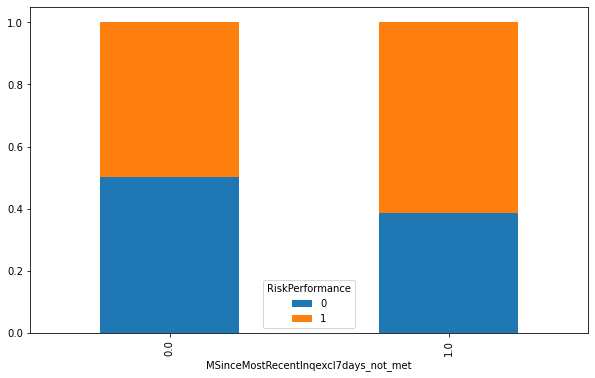

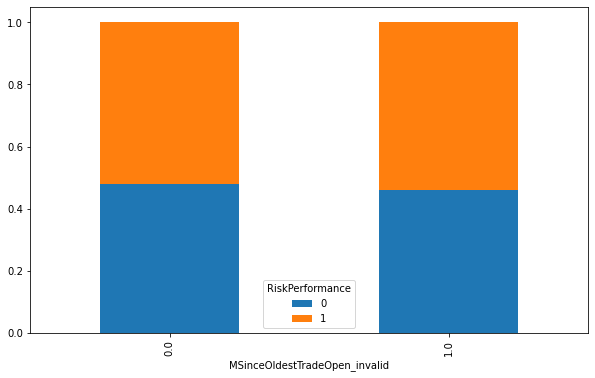

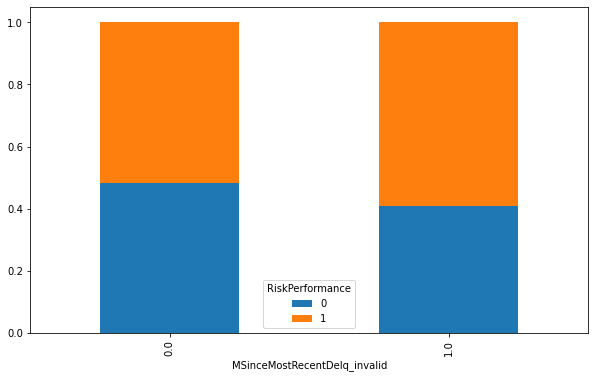

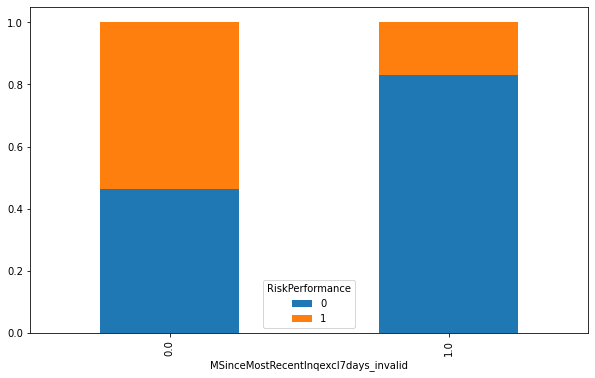

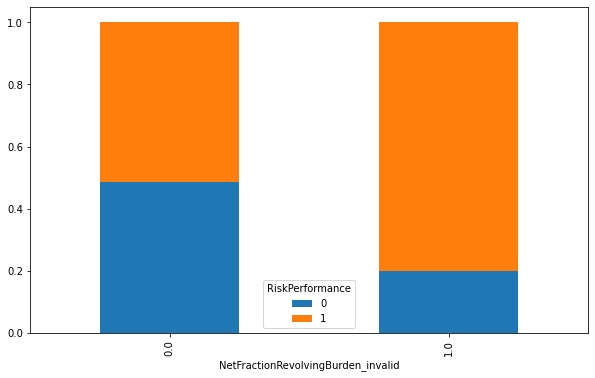

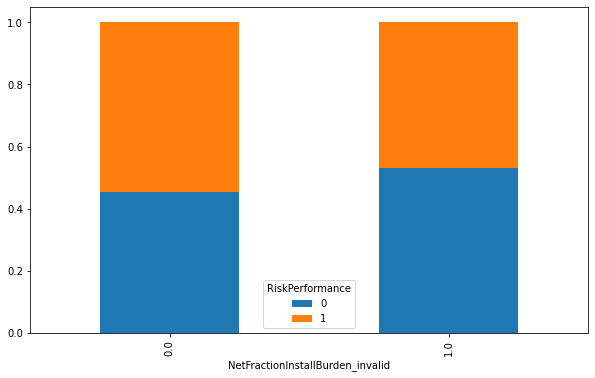

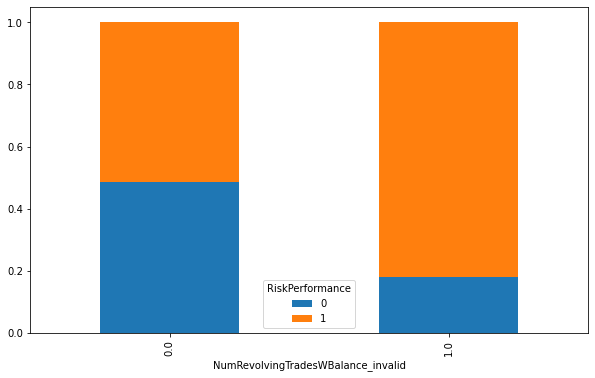

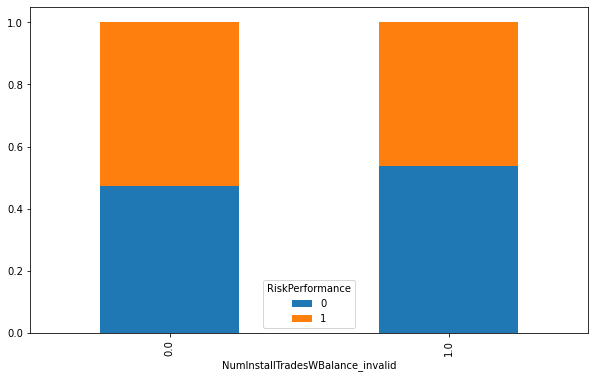

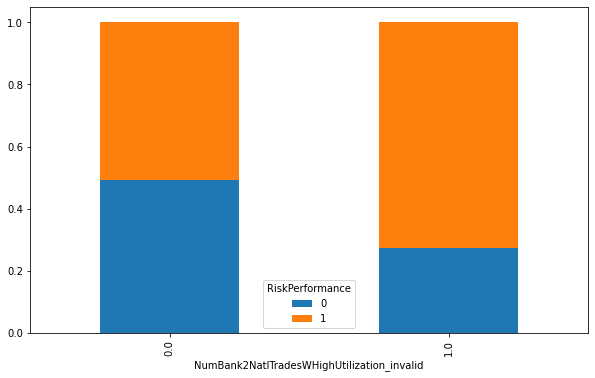

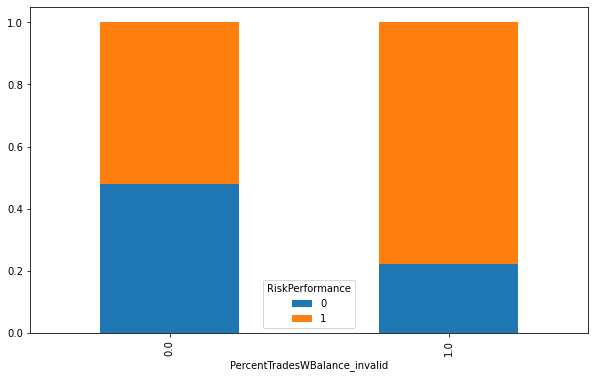

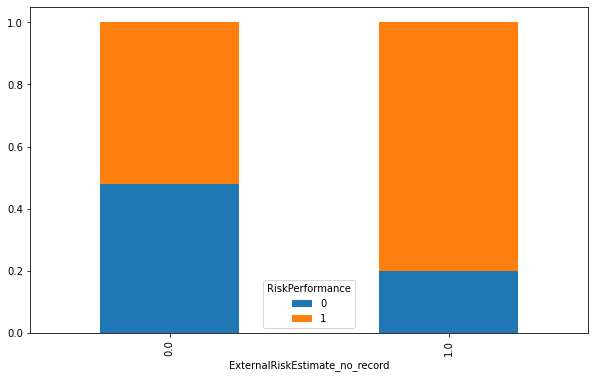

In [36]:
for col in X.columns[(raw.shape[1]):]:
    df = proc.groupby([col, 'RiskPerformance']).size().unstack()
    df['total'] = df.sum(axis=1)
    df = df.div(df.total, axis=0).drop(columns=['total'])
    df.plot(kind='bar', stacked=True, figsize=(10,6))
    plt.show()

## Model 1: Random Forest

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print(X_train.shape)
print(X_test.shape)

(8883, 35)
(988, 35)


In [38]:
rf_proc = RandomForestClassifier(n_estimators=150, max_features=0.7, min_samples_leaf=10, max_depth=10)
rf_proc.fit(X_train, y_train)
print(rf_proc.score(X_train, y_train))
print(rf_proc.score(X_test, y_test))

0.812225599459642
0.7591093117408907


In [39]:
from joblib import dump, load

In [40]:
!pwd

/Users/felix/code/ml/ethical-ai/nbs


In [41]:
!mkdir ../models

In [42]:
!ln -s ../models

In [43]:
dump(rf_proc, 'models/heloc_rf.joblib')

['models/heloc_rf.joblib']

In [49]:
proc.to_feather('data/heloc/heloc_preprocessed.feather')

In [51]:
!ls -lh data/heloc

total 6920
-rw-r--r--@ 1 felix  staff    12K Mar 16 07:22 heloc_data_dictionary-2.xlsx
-rw-r--r--@ 1 felix  staff   663K Mar 16 07:17 heloc_dataset_v1.csv
-rw-r--r--  1 felix  staff   2.7M Mar 20 15:21 heloc_preprocessed.feather
